# **ArtLine**


In [2]:
!git clone https://github.com/vijishmadhavan/ArtLine.git ArtLine

Cloning into 'ArtLine'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 438 (delta 18), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (438/438), 349.33 KiB | 17.47 MiB/s, done.
Resolving deltas: 100% (223/223), done.


In [3]:
cd ArtLine

/content/ArtLine


In [4]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 20.4MB 7.1MB/s 
     |████████████████████████████████| 10.5MB 188kB/s 
     |████████████████████████████████| 748.8MB 24kB/s 
     |████████████████████████████████| 5.9MB 13.9MB/s 
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.17.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalli

# **Runtime**



In [3]:
# import fastai
from fastai.vision import *
from fastai.utils.mem import *
from fastai.vision import open_image, load_learner, image, torch
import numpy as np
import urllib.request
import PIL.Image
from io import BytesIO
import torchvision.transforms as T
from PIL import Image
import requests
from io import BytesIO
import fastai
from fastai.vision import *
from fastai.utils.mem import *
from fastai.vision import open_image, load_learner, image, torch
import numpy as np
import urllib.request
import PIL.Image
from PIL import Image
from io import BytesIO
import torchvision.transforms as T
import glob, os


In [4]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

In [7]:
#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# If the trained model is on your google drive copy that otherwise use second option downloading from internet

In [5]:
# learn=load_learner('/content/drive/MyDrive/ArtLine', 'ArtLine_650.pkl')

In [ ]:
learn=load_learner('/content/drive/MyDrive/ArtLine', 'ArtLine_920.pkl')

# Getting model from Internet

In [8]:
# MODEL_URL = "https://www.dropbox.com/s/starqc9qd2e1lg1/ArtLine_650.pkl?dl=1"
# urllib.request.urlretrieve(MODEL_URL, "ArtLine_650.pkl")
# path = Path(".")
# learn=load_learner(path, 'ArtLine_650.pkl')

In [ ]:
# MODEL_URL = "https://www.dropbox.com/s/04suaimdpru76h3/ArtLine_920.pkl?dl=1 "
# urllib.request.urlretrieve(MODEL_URL, "ArtLine_920.pkl")
# path = Path(".")
# learn=load_learner(path, 'ArtLine_920.pkl')

# Input image
Copy from local path or type in a url to a direct link of an **high quality image**. Usually that means they'll end in .png, .jpg, etc. 

**Note** : Works well with **portrait photos having good lighting and plain background**. But you're free to explore.

In [ ]:
cp -R /content/ArtLine /content/drive/MyDrive

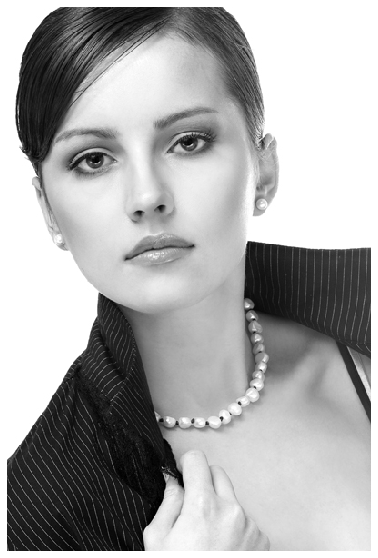

In [6]:
url = '/content/drive/MyDrive/ArtLine/1210183885MFiIHaH.jpg' #@param {type:"string"}

# response = requests.get(url)
# img = PIL.Image.open(url)
# im_new = add_margin(url, 250, 250, 250, 250, (255, 255, 255))
# # im_new.save("test.jpg", quality=95)
img = open_image(url)
# img = add_margin(im_new, 250, 250, 250, 250, (255, 255, 255))
show_image(img, figsize=(10,10), interpolation='nearest');

In [ ]:
# url = 'https://filmspell.com/wp-content/uploads/2019/12/ford-ferrari-anatomy-promo-videoSixteenByNine1050-990x556.jpg' #@param {type:"string"}

# response = requests.get(url)
# img = PIL.Image.open(BytesIO(response.content)).convert("RGB")
# im_new = add_margin(img, 250, 250, 250, 250, (255, 255, 255))
# im_new.save("test.jpg", quality=95)
# img = open_image("test.jpg")
# show_image(img, figsize=(10,10), interpolation='nearest');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


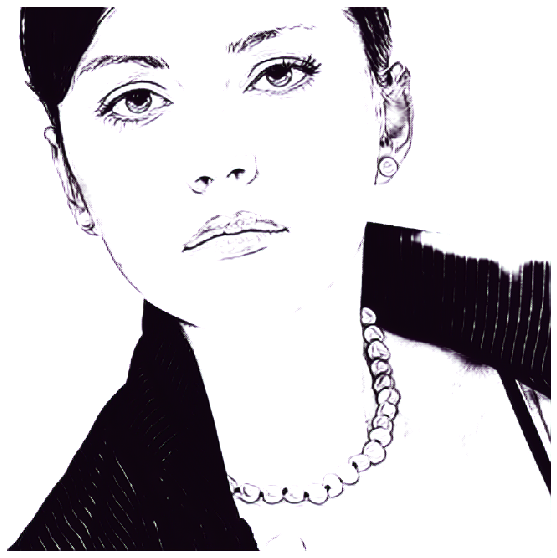

In [7]:
p,img_hr,b = learn.predict(img)
show_image(img_hr, figsize=(10,10), interpolation='nearest');

In [ ]:
p.save('/content/drive/MyDrive/ArtLine/b.jpg')

In [ ]:
p.shape

torch.Size([3, 920, 920])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


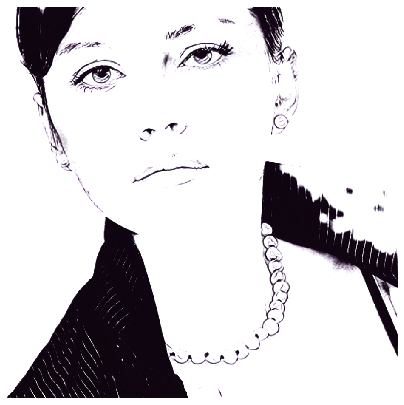

In [ ]:
show_image(b, figsize=(7,12), interpolation='nearest');

# Process images from folder with use of a widget

In [ ]:
def folder_check(path):
    try_num = 1
    oripath = path[:-1] if path.endswith('/') else path
    if(not os.path.exists(path)):
      os.mkdir(path)
      print(path, '   created')
    else:    
      while os.path.exists(path):
          print("Delete content of  existing folder " + path + "?(Y/N)")
          decision = input()
          if decision == "Y":
              shutil.rmtree(path, ignore_errors=True)
              os.mkdir(path)
              return path

              break
          else:
            path = oripath + "_%d/"%try_num
            try_num += 1
            if(not os.path.exists(path)):
              print("Create new folder " + path + "?(Y/N)")
              decision = input()
              if decision == "Y":
                os.mkdir(path)
                print(path, 'was created')
                break
      return path

In [ ]:
def conv_pict_with_line_art(in_folder, out_folder):
  
  out_folder=folder_check(out_folder)# check if output folder exist or not and create it
  
  in_folder= in_folder+'/*.jpg'

  for f in glob.glob(in_folder):
    
    f_out= f[:-4]+'_line_art.jpg'
    img = open_image(f)
    print('File  {}      is processed...'. format(f))
    p,img_hr,b = learn.predict(img)
    p.save(f_out)
    print(out_folder ,"/", os.path.basename(f_out))
    os.replace(f_out, out_folder +"/"+os.path.basename(f_out))



In [ ]:
#@title Give the input and output folder for photos { display-mode: "form" }
# Data = "data_dst" #@param ["data_src", "data_dst"]
folder_with_jpg_to_process = "/content/drive/MyDrive/ArtLine/fotki" #@param [""] {allow-input: true}
output_folder = "/content/drive/MyDrive/ArtLine/fotki/output" #@param [""] {allow-input: true}

in_folder = folder_with_jpg_to_process # this important as when you take directly file to process it take last
out_folder = output_folder
conv_pict_with_line_art(in_folder, out_folder)

Delete content of  existing folder /content/drive/MyDrive/ArtLine/fotki/output?(Y/N)
Y
File  /content/drive/MyDrive/ArtLine/fotki/inspiration-m.jpg      is processed...
/content/drive/MyDrive/ArtLine/fotki/output / inspiration-m_line_art.jpg
File  /content/drive/MyDrive/ArtLine/fotki/kwiatek.jpg      is processed...
/content/drive/MyDrive/ArtLine/fotki/output / kwiatek_line_art.jpg
File  /content/drive/MyDrive/ArtLine/fotki/kwiat.jpg      is processed...
/content/drive/MyDrive/ArtLine/fotki/output / kwiat_line_art.jpg
File  /content/drive/MyDrive/ArtLine/fotki/gwiazdka.jpg      is processed...
/content/drive/MyDrive/ArtLine/fotki/output / gwiazdka_line_art.jpg
File  /content/drive/MyDrive/ArtLine/fotki/kwiatuszek.jpg      is processed...
/content/drive/MyDrive/ArtLine/fotki/output / kwiatuszek_line_art.jpg
File  /content/drive/MyDrive/ArtLine/fotki/1210183885MFiIHaH.jpg      is processed...
/content/drive/MyDrive/ArtLine/fotki/output / 1210183885MFiIHaH_line_art.jpg


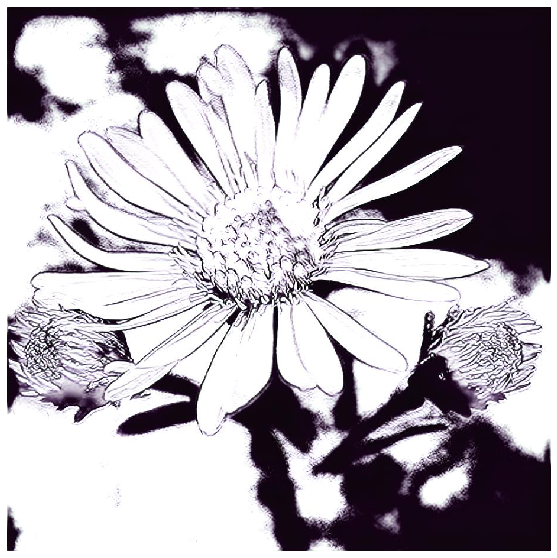

In [ ]:
url = '/content/drive/MyDrive/ArtLine/fotki/output/kwiat_line_art.jpg' #@param {type:"string"}

# response = requests.get(url)
# img = PIL.Image.open(url)
# im_new = add_margin(url, 250, 250, 250, 250, (255, 255, 255))
# # im_new.save("test.jpg", quality=95)
img = open_image(url)
# img = add_margin(im_new, 250, 250, 250, 250, (255, 255, 255))
show_image(img, figsize=(10,10), interpolation='nearest');